In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def der(initial_conditions: list, t, sigma, r, b) -> list:
    '''
    Returns a list of the values of the derivatives given the parameters
    
        Parameters:
            initial_conditions (list): List containing the initial conditions of x and y
            t: Unused np.linspace parameter
            params (list): List of the parameters
            
        Returns:
            dydt (list): List of the values of the derivates
    '''
    
    
    x = initial_conditions[0]
    y = initial_conditions[1]
    z = initial_conditions[2]
    dydt = [sigma * (y - x),
            r * x - y - x * z,
            x * y - b * z]
    return dydt

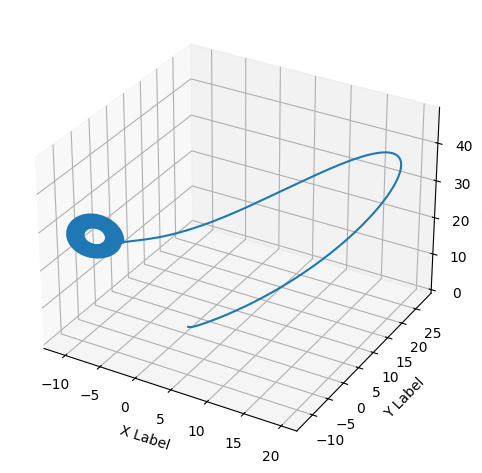

In [16]:
# Parameters - sigma, r, b
params = (10, 28, 8/3)
# Initial Conditions
x0 = [0, 1, 0]
# Time interval and number of steps
t = np.linspace(0, 10, 10000)
# Solve
sol = odeint(der, x0, t, args=(params))
# Plot
# plt.plot(sol[:, 0], sol[:, 1])# Creating a 3D scatter plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(sol[:,0],sol[:,1],sol[:,2],)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.tight_layout()
plt.show()

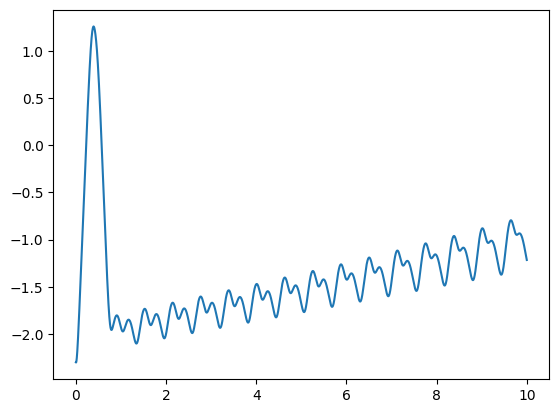

In [17]:
x1 = [0, 1, 0]
x2 = [0, 1.1, 0]

sol1 = odeint(der, x1, t, args=(params))
sol2 = odeint(der, x2, t, args=(params))

squares = (sol1 - sol2)**2
sums = np.sum(squares, 1)
dist = np.log(np.sqrt(sums))

plt.plot(t, dist)
plt.show()